>### `Mental Health Matters Sentimental Analysis` 

>##### `Importing Libraries`

In [1]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# conda install tweepy
# conda install textblob
# conda install wordcloud

In [2]:
# Reading the Data
df = pd.read_excel("vicinitas_search_resultsMentalHealthMatters.xlsx")

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

Finally, we’ll use the polarity_scores() method to get the sentiment metrics for a piece of text. You can see the authors have included it in a function with some print formatting to make it a bit easier to read.



In [4]:
def print_sentiment_scores(sentence):
    snt = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [5]:
import re   # regular expression
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [6]:
stopWords = stopwords.words('english')

In [512]:
#from wordcloud import WordCloud, StopWords

stopWords.extend(['week'])

In [114]:
stopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [513]:
# cleaning the  data 
def CleanData(sentence):
    processedList = ""
    
    #convert to lowercase and ignore special charcter
    sentence = re.sub(r'[^A-Za-z0-9\s.]', r'', str(sentence).lower())
    sentence = re.sub(r'\n', r' ', sentence)
    #sentence = [ps.stem(word) for word in sentence if  word not in stopwords.words('english')]
    #sentence = [lemmatizer.lemmatize(word) for word in sentence if word not in stopwords.words('english')]
    #sentence = ' '.join(sentence)
    sentence = " ".join([word for word in sentence.split() if word not in stopWords])
    
    return sentence

In [12]:
import string

In [13]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    text = strip_links(text)
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words).lower()




In [514]:
# stops words for ignoring 
from nltk.corpus import stopwords
import re

In [415]:
df.head()

,Text,Mentions,review
0,RT @6AMGroup : Social anxiety is more common t...,0,rt 6amgroup social anxiety common think. ways ...
1,Happy Weekend :) Stay safe+happy!\n\n#weekendv...,0,happy weekend stay safehappy weekendvibes frid...
2,RT @NoBrainersNFT : Just because no one can he...,0,rt nobrainersnft one heal inner work doesnt me...
3,RT @HubCounselling : Dyslexia &amp; Mental Hea...,0,rt hubcounselling dyslexia amp mental health. ...
4,Some people suffer in silence. Mental health m...,0,people suffer silence. mental health matters. ...


In [14]:
df.columns

Index(['Text', 'Mentions'], dtype='object')

In [15]:
df=df[['Text','Mentions']]

In [10]:
df.head()

,Text,Mentions
0,RT @6AMGroup : Social anxiety is more common t...,0
1,Happy Weekend :) Stay safe+happy!\n\n#weekendv...,0
2,RT @NoBrainersNFT : Just because no one can he...,0
3,RT @HubCounselling : Dyslexia &amp; Mental Hea...,0
4,Some people suffer in silence. Mental health m...,0


In [16]:
strip_all_entities(df['Text'][0])

'rt social anxiety is more common than you think here are a few ways to combat anxiety at raves and music festivals so that you can party with peace of mind ☮️'

In [17]:
df['review'] = df['Text'].map(lambda x: strip_all_entities(x))


In [18]:
df['review'][1]

'happy weekend stay safe happy'

In [19]:
# printing after vadar sentimental analysis done
print_sentiment_scores(df['review'][0])


rt social anxiety is more common than you think here are a few ways to combat anxiety at raves and music festivals so that you can party with peace of mind ☮️ {'neg': 0.132, 'neu': 0.591, 'pos': 0.277, 'compound': 0.8126}


In [521]:
print_sentiment_scores("epitome attention detail we me congratulations")

epitome attention detail we me congratulations {'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'compound': 0.5994}


In [20]:
# using while loop for printing all the statement reviews with vadar sentimental analysis
c=[]
i = 1
while i < len(df['review']):
    print(print_sentiment_scores(df['review'][i]))
    i += 1
    
    c.append(print_sentiment_scores(df['review'][i]))

happy weekend stay safe happy----------- {'neg': 0.0, 'neu': 0.163, 'pos': 0.837, 'compound': 0.8834}
None
rt just because no one can heal or do your inner work for you doesn t mean you have to do it alone {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4939}
rt just because no one can heal or do your inner work for you doesn t mean you have to do it alone {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.4939}
None
rt dyslexia amp mental health an honest insight into one of our directors world and the struggles that can bring {'neg': 0.105, 'neu': 0.756, 'pos': 0.139, 'compound': 0.2023}
rt dyslexia amp mental health an honest insight into one of our directors world and the struggles that can bring {'neg': 0.105, 'neu': 0.756, 'pos': 0.139, 'compound': 0.2023}
None
some people suffer in silence mental health matters keep passing this along {'neg': 0.24, 'neu': 0.685, 'pos': 0.075, 'compound': -0.5267}
some people suffer in silence mental health matters keep passing this 

rt re this is wonderful from astro genie {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}
rt re this is wonderful from astro genie {'neg': 0.0, 'neu': 0.654, 'pos': 0.346, 'compound': 0.5719}
None
we re excited to share our first post 🎉 beginning therapy 6⃣ things to consider before your first outpatient appointment check it out here➡️ {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.743}
we re excited to share our first post 🎉 beginning therapy 6⃣ things to consider before your first outpatient appointment check it out here➡️ {'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.743}
None
gonna do some tags here----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
gonna do some tags here----------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
t 101 well done to all well done 👍🏻 amazing effort {'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.7906}
t 101 well done to all well done 👍🏻 amazing effort {'neg': 0.0, 'neu': 0.6, 'pos'

another busy week for julie at our training academy she had the pleasure of teaching these wonderful ladies from all about building self confidence amp resilience yesterday ☺️ {'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.9287}
another busy week for julie at our training academy she had the pleasure of teaching these wonderful ladies from all about building self confidence amp resilience yesterday ☺️ {'neg': 0.0, 'neu': 0.646, 'pos': 0.354, 'compound': 0.9287}
None
rt live with some more ❤️ do you pass the vibe check {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt live with some more ❤️ do you pass the vibe check {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
live with some more ❤️ do you pass the vibe check {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
live with some more ❤️ do you pass the vibe check {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
rt great to have a visit from steve brine mp today we had an engaging conversation about 

for y8 decided to go to the park with y9 milton to show that little acts of friendship in nature can really benefit our mental health {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.7122}
for y8 decided to go to the park with y9 milton to show that little acts of friendship in nature can really benefit our mental health {'neg': 0.0, 'neu': 0.802, 'pos': 0.198, 'compound': 0.7122}
None
rt as of 2021 about 47 million americans were reportedly struggling with a mental illness it is okay to reach out for help all of us need to work towards being sensitive to this let s not shun people for getting help or speaking up {'neg': 0.104, 'neu': 0.737, 'pos': 0.159, 'compound': 0.2263}
rt as of 2021 about 47 million americans were reportedly struggling with a mental illness it is okay to reach out for help all of us need to work towards being sensitive to this let s not shun people for getting help or speaking up {'neg': 0.104, 'neu': 0.737, 'pos': 0.159, 'compound': 0.2263}
None
rt drop 💙💙

None
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
None
rt healing is not a linear process healing takes time and effort but recovery is possible💙 rt {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.7783}
rt healing is not a linear process healing takes time and effort but recovery is possible💙 rt {'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.7783}
None
rt ot----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
rt ot----------------------------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None
6 natural substances for stress relief and relaxation read to find out what they are {'neg': 0.123, 'neu': 0.482, 'pos': 0.395, 'compound': 0.7351}
6 natural substances for stress relief and relaxation read to find out what they are {'neg': 0.123, 'neu': 0.482, 'pos': 0.395, 'compound': 0.

the more i let go the better i feel 🖤--- {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.7964}
the more i let go the better i feel 🖤--- {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'compound': 0.7964}
None
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
---------------------------------------- {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
None
gt gt gt why bizarre day lt lt lt------- {'neg': 0.169, 'neu': 0.368, 'pos': 0.463, 'compound': 0.4588}
gt gt gt why bizarre day lt lt lt------- {'neg': 0.169, 'neu': 0.368, 'pos': 0.463, 'compound': 0.4588}
None
rt below are simple tips you can use to help some dealing with depression let us know in the comment section what your thoughts are and if you will apply them in future {'neg': 0.099, 'neu': 0.829, 'pos': 0.072, 'compound': -0.25}
rt below are simple tips you can use to help some dealing with depression let us know in the comment section what your thoughts are and if you will appl

rt events our wellbeing workshop with of has begun with andy saying that isn t a nice to have it s an essential part of everyone s lives in find out more about here {'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'compound': 0.4215}
None
rt stevecroshaw safeguard by pc 1942 thank you young ben actor {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.6249}
rt stevecroshaw safeguard by pc 1942 thank you young ben actor {'neg': 0.0, 'neu': 0.638, 'pos': 0.362, 'compound': 0.6249}
None
our wellbeing workshop with of has begun with andy saying that isn t a nice to have it s an essential part of everyone s lives in find out more about here {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.4215}
our wellbeing workshop with of has begun with andy saying that isn t a nice to have it s an essential part of everyone s lives in find out more about here {'neg': 0.0, 'neu': 0.917, 'pos': 0.083, 'compound': 0.4215}
None
we are offering adults over the age of 65 a friendly twice weekly gathering for

rt c a want to know how to be a good mate to a friend who might be struggling come along to one of these free sessions {'neg': 0.079, 'neu': 0.62, 'pos': 0.301, 'compound': 0.7845}
None
rt therapy anxiety have you tried making an artwork of your anxiety and visualising it vanishing is it possible to understand the source amp assess the situation {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compound': -0.34}
rt therapy anxiety have you tried making an artwork of your anxiety and visualising it vanishing is it possible to understand the source amp assess the situation {'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compound': -0.34}
None
want to know how to be a good mate to a friend who might be struggling come along to one of these free sessions {'neg': 0.086, 'neu': 0.585, 'pos': 0.329, 'compound': 0.7845}
want to know how to be a good mate to a friend who might be struggling come along to one of these free sessions {'neg': 0.086, 'neu': 0.585, 'pos': 0.329, 'compound': 0.7845}
None
rt we ended me

rt g’day💕wishing you all a vibrant day💕with love from hervey bay💕 {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.9169}
rt g’day💕wishing you all a vibrant day💕with love from hervey bay💕 {'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'compound': 0.9169}
None
rt talking about mental health reduces stigma and helps to create more supportive communities we are really proud that here at the centre many of our staff team are trained mental health first aiders please contact us 01885 488495 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.8976}
rt talking about mental health reduces stigma and helps to create more supportive communities we are really proud that here at the centre many of our staff team are trained mental health first aiders please contact us 01885 488495 {'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.8976}
None
rt it’s so important for children to know it’s okay to feel… {'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'compound': 0.505}
rt it’s so important for childr

rt happy friday all have a great day and a fab weekend {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.8957}
None
happy friday all have a great day and a fab weekend {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.8957}
happy friday all have a great day and a fab weekend {'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'compound': 0.8957}
None
rt edward i love you-------------------- {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
rt edward i love you-------------------- {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
None
rt hijabii afterall is just a hashtag who applies it in irl i mean cmmon look at maharashtra board now 😀 {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.3612}
rt hijabii afterall is just a hashtag who applies it in irl i mean cmmon look at maharashtra board now 😀 {'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'compound': 0.3612}
None
rt celebrate this----------------------- {'neg': 0.0, 'neu': 0.351, 'pos': 0.649, 'compound': 0.5719}


None
rt 95 i feel mental peace calmness happiness in life is much more important gt gt gt gt than chasing money companies in our life {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.9574}
rt 95 i feel mental peace calmness happiness in life is much more important gt gt gt gt than chasing money companies in our life {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.9574}
None
rt listen to your mind and body taking regular breaks helps us feel energised and focused on the task at hand {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.8885}
rt listen to your mind and body taking regular breaks helps us feel energised and focused on the task at hand {'neg': 0.0, 'neu': 0.596, 'pos': 0.404, 'compound': 0.8885}
None
rt 95 i feel mental peace calmness happiness in life is much more important gt gt gt gt than chasing money companies in our life {'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.9574}
rt 95 i feel mental peace calmness happiness in life is much more importa

KeyError: 2062

In [320]:
#df.to_excel("Results_new.xlsx")

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
text = df['review']
scores = []
for txt in text:
    vs = analyzer.polarity_scores(txt)
    scores.append(vs)
#data = pd.DataFrame(df['review'], columns= ['Text'])
data2 = pd.DataFrame(scores)
final_dataset= pd.concat([df['review'],data2], axis=1)

In [22]:
final_dataset

,review,neg,neu,pos,compound
0,rt social anxiety is more common than you thin...,0.132,0.591,0.277,0.8126
1,happy weekend stay safe happy,0.000,0.163,0.837,0.8834
2,rt just because no one can heal or do your inn...,0.167,0.833,0.000,-0.4939
3,rt dyslexia amp mental health an honest insigh...,0.105,0.756,0.139,0.2023
4,some people suffer in silence mental health ma...,0.240,0.685,0.075,-0.5267
...,...,...,...,...,...
2057,rt edward i love you,0.000,0.488,0.512,0.6369
2058,rt please see details below 👇🏽 friday is ‘dres...,0.000,0.780,0.220,0.5859
2059,rt day “pain tells us that we have put our sur...,0.118,0.882,0.000,-0.4939
2060,rt anybody else,0.000,1.000,0.000,0.0000


for i in range(len(final_dataset)):
    if final_dataset['Compound'][i] > 0 :
        final_dataset['Sc'][i]= "Positive"
    elif final_dataset['Compound'][i] < 0 :
        final_dataset['Sc'][i]= "Negative"
    else :
        final_dataset['Sc'][i]= "Neutral"
    #final_dataset['Score']= 

In [23]:
final_dataset.rename({'neg':'Negative','neu':'Neutral','pos':'Positive','compound':'Compound'},axis=1,inplace=True)

In [24]:
final_dataset

,review,Negative,Neutral,Positive,Compound
0,rt social anxiety is more common than you thin...,0.132,0.591,0.277,0.8126
1,happy weekend stay safe happy,0.000,0.163,0.837,0.8834
2,rt just because no one can heal or do your inn...,0.167,0.833,0.000,-0.4939
3,rt dyslexia amp mental health an honest insigh...,0.105,0.756,0.139,0.2023
4,some people suffer in silence mental health ma...,0.240,0.685,0.075,-0.5267
...,...,...,...,...,...
2057,rt edward i love you,0.000,0.488,0.512,0.6369
2058,rt please see details below 👇🏽 friday is ‘dres...,0.000,0.780,0.220,0.5859
2059,rt day “pain tells us that we have put our sur...,0.118,0.882,0.000,-0.4939
2060,rt anybody else,0.000,1.000,0.000,0.0000


In [25]:
final_dataset['Score'] = final_dataset[['Negative','Neutral','Positive']].idxmax(axis=1)

In [26]:
final_dataset['Score'].value_counts()

Neutral     1787
Positive     168
Negative     107
Name: Score, dtype: int64

In [527]:
final_dataset.head()

,Text,Negative,Neutral,Positive,Compound,Score
0,RT @6AMGroup : Social anxiety is more common t...,0.227,0.431,0.341,0.5994,Neutral
1,Happy Weekend :) Stay safe+happy!\n\n#weekendv...,0.000,0.671,0.329,0.8834,Neutral
2,RT @NoBrainersNFT : Just because no one can he...,0.000,0.863,0.137,0.1877,Neutral
3,RT @HubCounselling : Dyslexia &amp; Mental Hea...,0.105,0.756,0.139,0.2023,Neutral
4,Some people suffer in silence. Mental health m...,0.179,0.765,0.056,-0.5267,Neutral


In [104]:
#final_dataset

In [27]:
final_dataset.to_excel("New_Result.xlsx")

In [106]:
#final_dataset['Sc'] = final_dataset['Compound'].map(lambda x: "Positive" if x > 0 "Negative" elif x<0 else "Neutral")

In [107]:
#final_dataset['Sc'] = final_dataset['Compound'].map(lambda x: "Negative" if x < 0 else "Neutral")

In [28]:
for i in range(len(final_dataset)):
    if final_dataset['Compound'][i] >0:
        final_dataset['Score'][i]= "Positive"
    elif final_dataset['Compound'][i] <= -0.2:
        final_dataset['Score'][i]= "Negative"
    else :
        final_dataset['Score'][i]= "Neutral"

<ipython-input-28-e3d018cef47f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Score'][i]= "Positive"
<ipython-input-28-e3d018cef47f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Score'][i]= "Negative"
<ipython-input-28-e3d018cef47f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Score'][i]= "Neutral"


In [29]:
final_dataset.to_excel("New_Result_HealthMatter.xlsx")

In [531]:
final_dataset['Text'] = final_dataset['Text'].str.replace('MentalHealthMatters', '')

In [532]:
final_dataset['Text'] = final_dataset['Text'].str.replace('mental health', '')

In [533]:
final_dataset['Text'] = final_dataset['Text'].str.replace('mentalhealth', '')

In [534]:
final_dataset['Text'] = final_dataset['Text'].str.replace('https', '')

In [535]:
final_dataset['Text'] = final_dataset['Text'].str.replace('co', '')

In [536]:
final_dataset['Text'] = final_dataset['Text'].str.replace('t', '')

In [537]:
final_dataset['Text'] = final_dataset['Text'].str.replace('6Qu9GmM7ai', '')

In [538]:
final_dataset['Text'] = final_dataset['Text'].str.replace('RT', '')

In [539]:
final_dataset['Text'] = final_dataset['Text'].str.replace('6Qu9GmM7ai', '')

In [540]:
final_dataset['Text'] = final_dataset['Text'].str.replace('https', '')

In [541]:
final_dataset['Text'] = final_dataset['Text'].str.replace('wih','')

In [542]:
final_dataset['Text'] = final_dataset['Text'].str.replace('Menal Healh', '')

In [543]:
final_dataset['Text'] = final_dataset['Text'].str.replace('abou', '')

In [544]:




final_dataset['Text'] = final_dataset['Text'].str.replace('ha','')

In [545]:
final_dataset['Text'] = final_dataset['Text'].str.replace('maer','')

In [546]:
final_dataset['Text'] = final_dataset['Text'].str.replace('MenalHealhAwareness','')

In [547]:
final_dataset['Text'] = final_dataset['Text'].str.replace('Week','')

In [548]:
final_dataset['Text'] = final_dataset['Text'].str.replace('anxiey','')

In [549]:
final_dataset

,Text,Negative,Neutral,Positive,Compound,Score
0,@6AMGroup : Social is more mmon n you hink. ...,0.227,0.431,0.341,0.5994,Positive
1,Happy end :) Say safe+ppy!\n\n#weekendvibes #f...,0.000,0.671,0.329,0.8834,Positive
2,@NoBrainersNFT : Jus because no one can heal ...,0.000,0.863,0.137,0.1877,Positive
3,@HubCounselling : Dyslexia &amp; . An hones ...,0.105,0.756,0.139,0.2023,Positive
4,Some people suffer in silence. Menal healh s. ...,0.179,0.765,0.056,-0.5267,Negative
...,...,...,...,...,...,...
2057,@marrs_edward : # \nI love you ://./,0.000,0.488,0.512,0.6369,Positive
2058,@sirchleyschool : Please see deails below 👇🏽 ...,0.000,0.813,0.187,0.3182,Positive
2059,@bizarre_day_ : “Pain ells us we ve pu our s...,0.194,0.806,0.000,-0.7579,Negative
2060,@isamberwees : Anybody else? #ADHD #depressio...,0.310,0.690,0.000,-0.6597,Negative


In [30]:
positive = (final_dataset['Score']=="Positive").sum()

print(str(positive/(final_dataset.shape[0])*100) + " % of positive tweets")

60.911736178467514 % of positive tweets


In [31]:
neutral = (final_dataset['Score']=="Neutral").sum()

print(str(neutral/(final_dataset.shape[0])*100) + " % of neutral tweets")

26.867119301648884 % of neutral tweets


In [32]:
negative = (final_dataset['Score']=="Negative").sum()

print(str(negative/(final_dataset.shape[0])*100) + " % of negative tweets")

12.221144519883609 % of negative tweets


In [33]:
pos=positive/(final_dataset.shape[0])*100
neu=neutral/(final_dataset.shape[0])*100
neg=negative/(final_dataset.shape[0])*100

We can now visualise positive, negative, neutral tweets using Matplotlib.

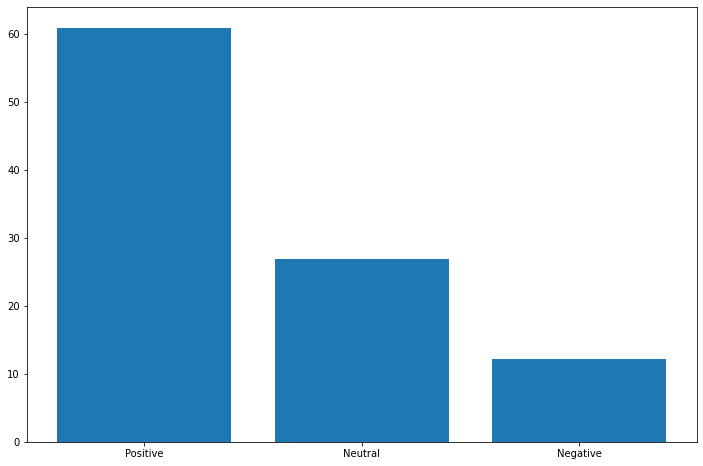

In [34]:
labels = ['Positive','Neutral','Negative']

values = [pos,neu,neg]

plt.bar(labels, values);

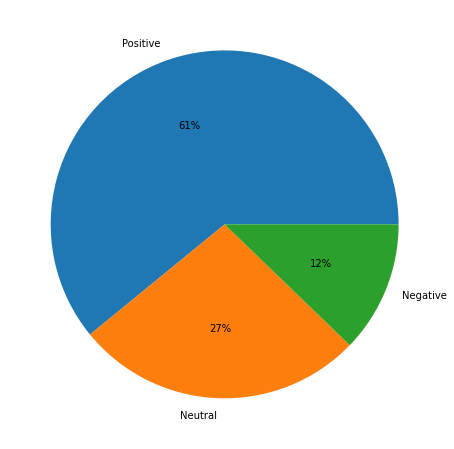

In [35]:
plt.pie(values,labels=labels,autopct="%1.0f%%");

In [36]:
f_pos=final_dataset[final_dataset['Score']=='Positive']
f_neg=final_dataset[final_dataset['Score']=='Negative']
f_neu=final_dataset[final_dataset['Score']=='Neutral']

In [46]:
from nltk.corpus import words, stopwords
#meaning_full_words = words.words()
meaning_full_words = set(w.lower() for w in nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))

meaningful_tweet_words = []

for tweet in f_pos['review']:
    for word in tweet.split():
        if analyzer.polarity_scores(word)["pos"] > 0.5:
            if word in meaning_full_words and len(word) > 2 and word not in stop_words and word not in meaningful_tweet_words:
            
                meaningful_tweet_words.append(word)        


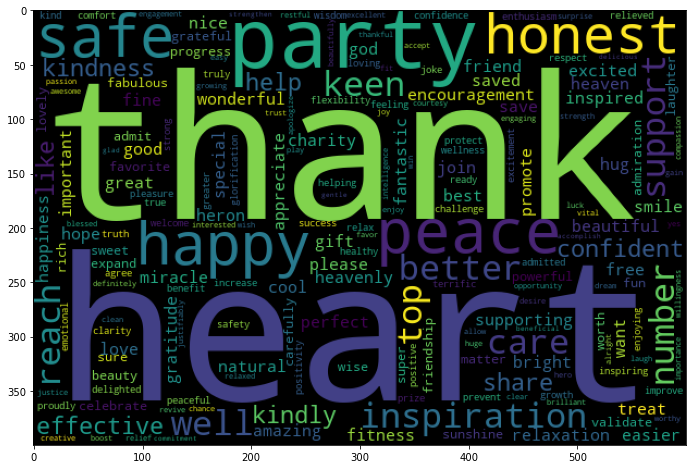

In [47]:
# Positive Words
words = ' '.join(meaningful_tweet_words)
wordCloud = WordCloud(width=600, height=400,stopwords=stopWords).generate(words)

plt.imshow(wordCloud)
plt.show()


In [48]:
from nltk.corpus import words, stopwords
#meaning_full_words = words.words()
meaning_full_words = set(w.lower() for w in nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))

meaningful_tweet_words = []

for tweet in f_pos['review']:
    for word in tweet.split():
        if analyzer.polarity_scores(word)["neg"] > 0.5:
            if word in meaning_full_words and len(word) > 2 and word not in stop_words and word not in meaningful_tweet_words:
            
                meaningful_tweet_words.append(word)        


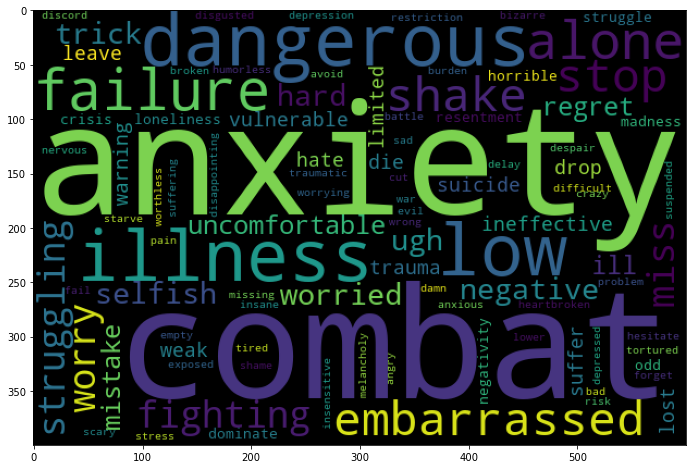

In [49]:
# Negative Words to view
words = ' '.join(meaningful_tweet_words)
wordCloud = WordCloud(width=600, height=400,stopwords=stopWords).generate(words)

plt.imshow(wordCloud)
plt.show()

In [50]:
from nltk.corpus import words, stopwords
#meaning_full_words = words.words()
meaning_full_words = set(w.lower() for w in nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))

meaningful_tweet_words = []

for tweet in f_pos['review']:
    for word in tweet.split():
        if analyzer.polarity_scores(word)["neu"] > 0.5:
            if word in meaning_full_words and len(word) > 2 and word not in stop_words and word not in meaningful_tweet_words:
            
                meaningful_tweet_words.append(word)        


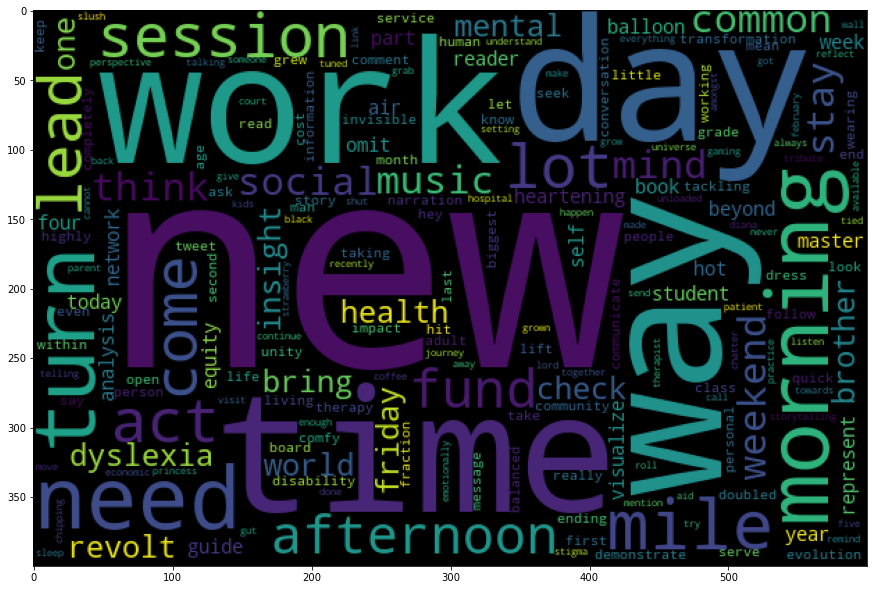

In [52]:
# Neutral words
words = ' '.join(meaningful_tweet_words)
wordCloud = WordCloud(width=600, height=400,stopwords=stopWords).generate(words)

plt.imshow(wordCloud)
plt.tight_layout(pad=0)
plt.show()

In [164]:
plt.savefig('neutral.png', facecolor='k', bbox_inches='tight')

<Figure size 864x576 with 0 Axes>

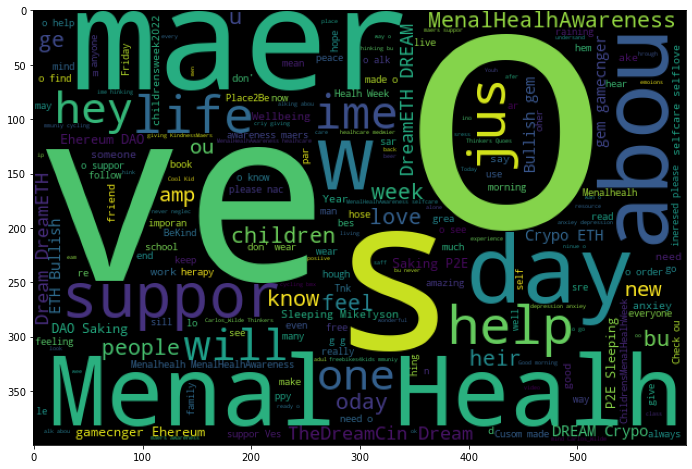

In [200]:
# Full dataset words
words = ' '.join([tweet for tweet in final_dataset['Text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

In [201]:
Sentiment=pd.DataFrame([pos,neg,neu],index=['Postive Sentiment','Negative Sentiment','Neutral Sentiment'],columns=['Percentage'])
#pd.concat([pos,neg,neu],)
Sentiment

,Percentage
Postive Sentiment,59.505335
Negative Sentiment,17.216295
Neutral Sentiment,23.278371


>## `Summary` 

**Mental Health Matters Team**

Health Matters , Supportive Positive Approach is there. So 

According to the Study Analysis, Positivity we have **59.5%** , Negative Tweets Sentiment **20.9%** , All the Neutral View **19.54%**.

